In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('rose.csv')

In [3]:
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
date_rng = pd.date_range(start='1/1/1980', periods = len(df), freq='M')
date_rng

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
df['Time_Stamp'] = date_rng
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [6]:
df.set_index('Time_Stamp',inplace=True)
df=df[['Rose']]
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [7]:
from pylab import rcParams
rcParams['figure.figsize']=20,8

Text(0, 0.5, 'Rose Wine Sales')

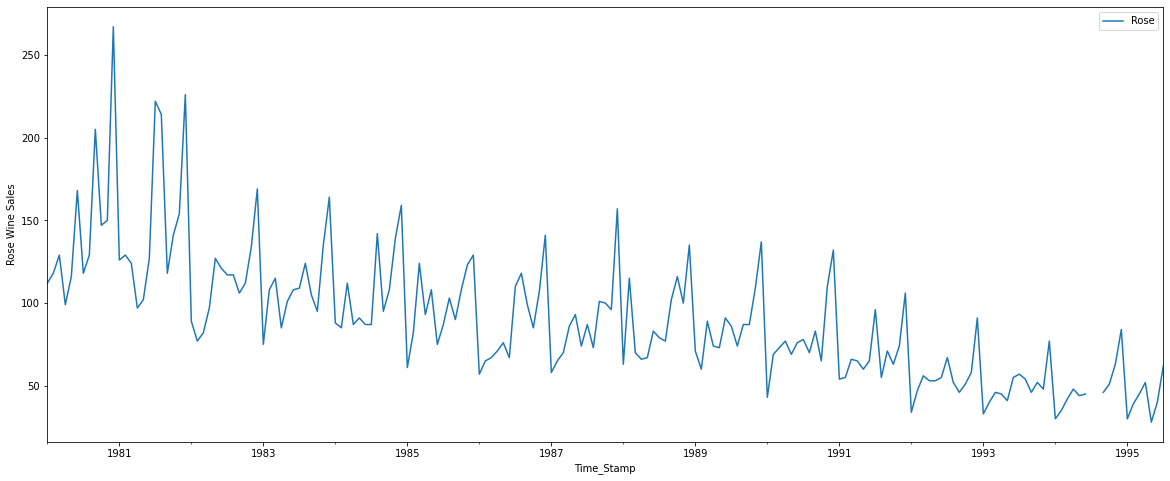

In [8]:
df.plot()
plt.ylabel('Rose Wine Sales')

## 2. Exploratory Analysis and Decomposition

In [9]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [10]:
df.shape

(187, 1)

#### Plot the Data to check the Trend and Seasonality

Text(0, 0.5, 'Wine Sales')

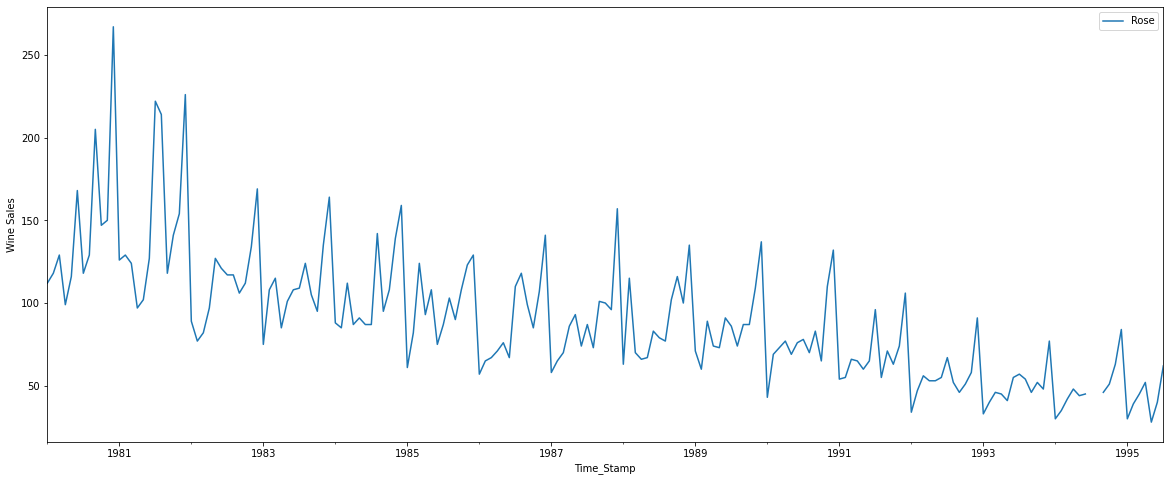

In [11]:
df.plot()
plt.ylabel('Wine Sales')

#### Monthly Boxplot

<AxesSubplot:xlabel='Time_Stamp', ylabel='Rose'>

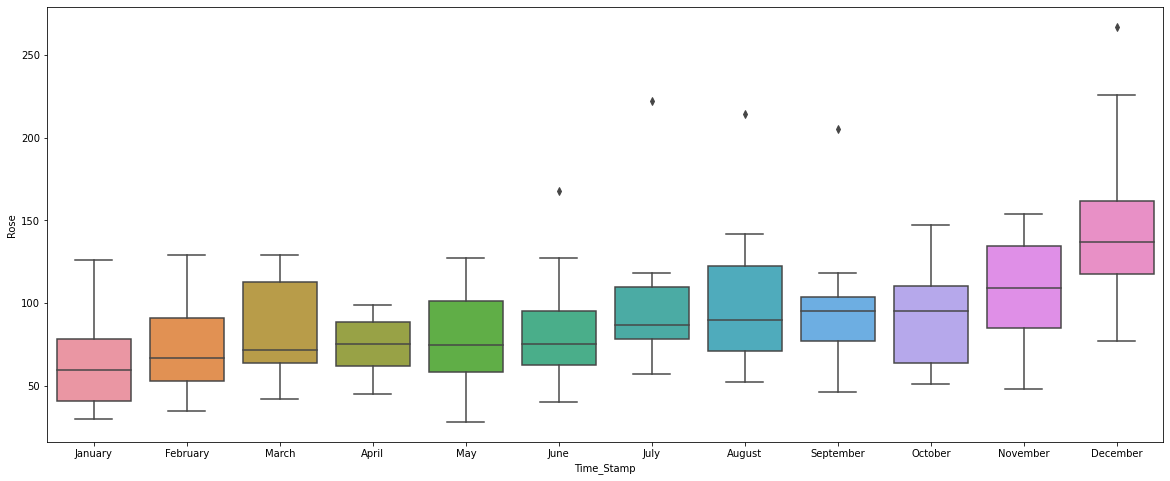

In [12]:
sns.boxplot(df.index.month_name(),df['Rose'])

#### Yearly BoxPlot

<AxesSubplot:xlabel='Time_Stamp', ylabel='Rose'>

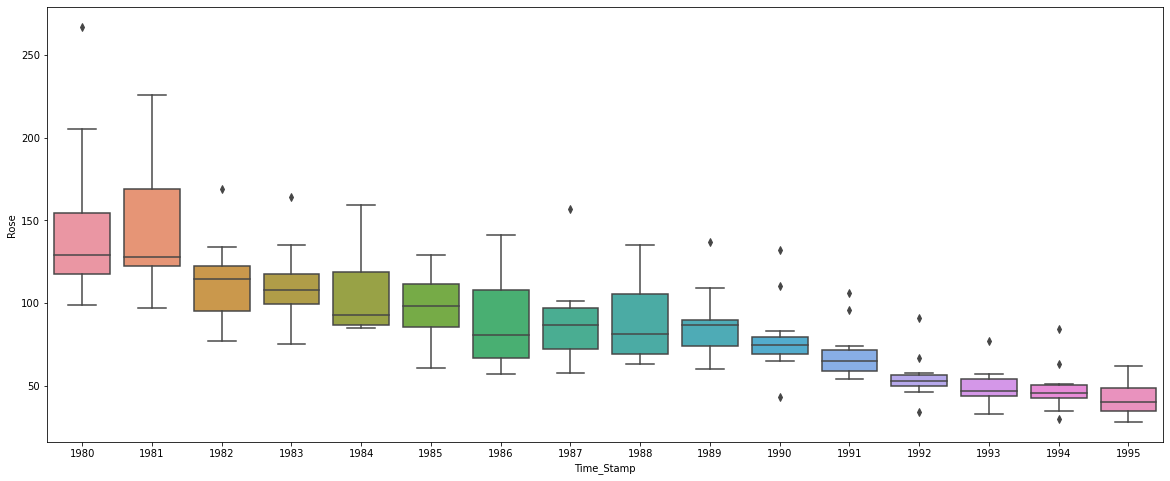

In [13]:
sns.boxplot(df.index.year,df['Rose'])

#### Check the Null Values

In [14]:
df.isnull().sum()

Rose    2
dtype: int64

In [15]:
df[df.isnull().any(axis=1)]

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


#### Interpolate the Missing Values

In [16]:
df=df.interpolate(method='spline',order=1)

In [17]:
df.tail(15)

,Rose
Time_Stamp,
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,46.155493
1994-08-31,47.221907
1994-09-30,46.000000
1994-10-31,51.000000
1994-11-30,63.000000
1994-12-31,84.000000
1995-01-31,30.000000


<AxesSubplot:xlabel='Time_Stamp'>

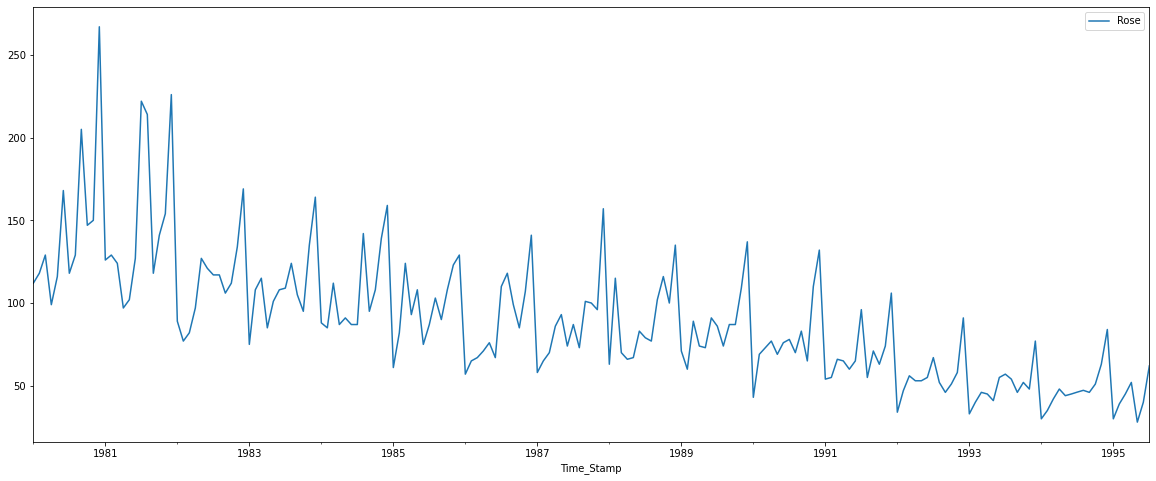

In [18]:
df.plot()

#### Decompose time series

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

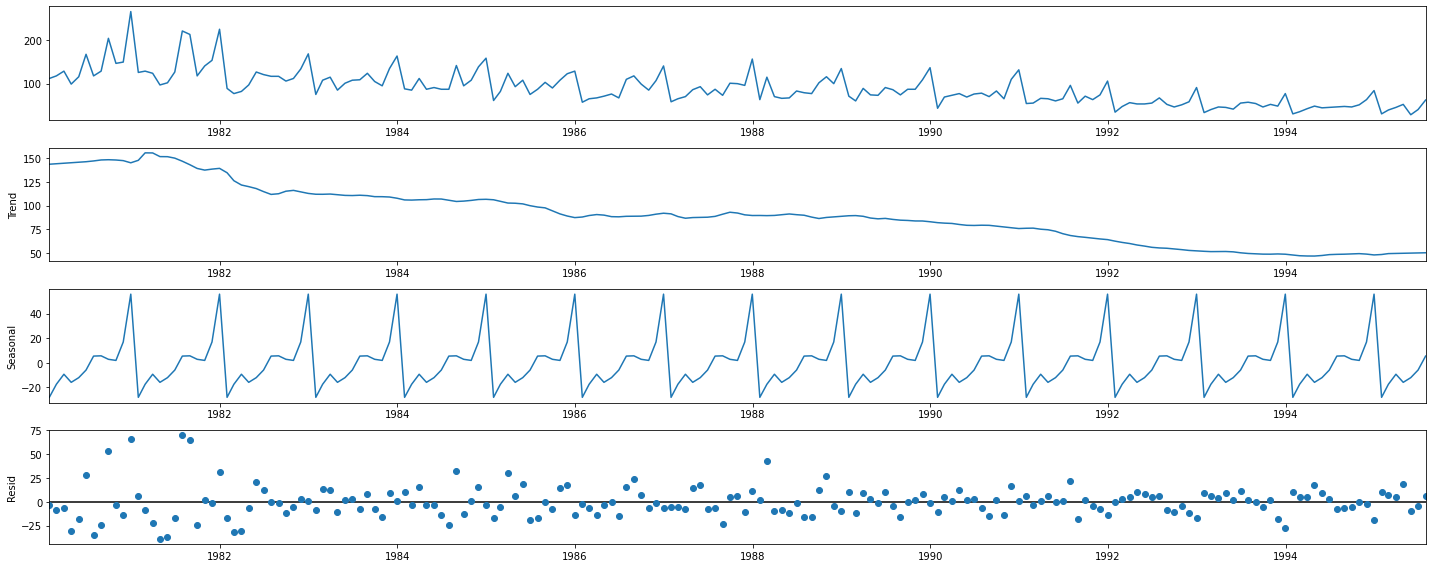

In [20]:
decompose=seasonal_decompose(df,model='additive',extrapolate_trend='freq')
decompose.plot();

In [21]:
decompose.trend

Time_Stamp
1980-01-31    143.619658
1980-02-29    144.148504
1980-03-31    144.677350
1980-04-30    145.206197
1980-05-31    145.735043
                 ...    
1995-03-31     49.408456
1995-04-30     49.582639
1995-05-31     49.756822
1995-06-30     49.931004
1995-07-31     50.105187
Name: trend, Length: 187, dtype: float64

In [22]:
decompose.seasonal

Time_Stamp
1980-01-31   -28.063568
1980-02-29   -17.444018
1980-03-31    -9.298431
1980-04-30   -15.865808
1980-05-31   -12.058185
                ...    
1995-03-31    -9.298431
1995-04-30   -15.865808
1995-05-31   -12.058185
1995-06-30    -5.898999
1995-07-31     5.462680
Name: seasonal, Length: 187, dtype: float64

In [23]:
decompose.resid

Time_Stamp
1980-01-31    -3.556090
1980-02-29    -8.704486
1980-03-31    -6.378919
1980-04-30   -30.340388
1980-05-31   -17.676858
                ...    
1995-03-31     4.889975
1995-04-30    18.283169
1995-05-31    -9.698637
1995-06-30    -4.032005
1995-07-31     6.432133
Name: resid, Length: 187, dtype: float64

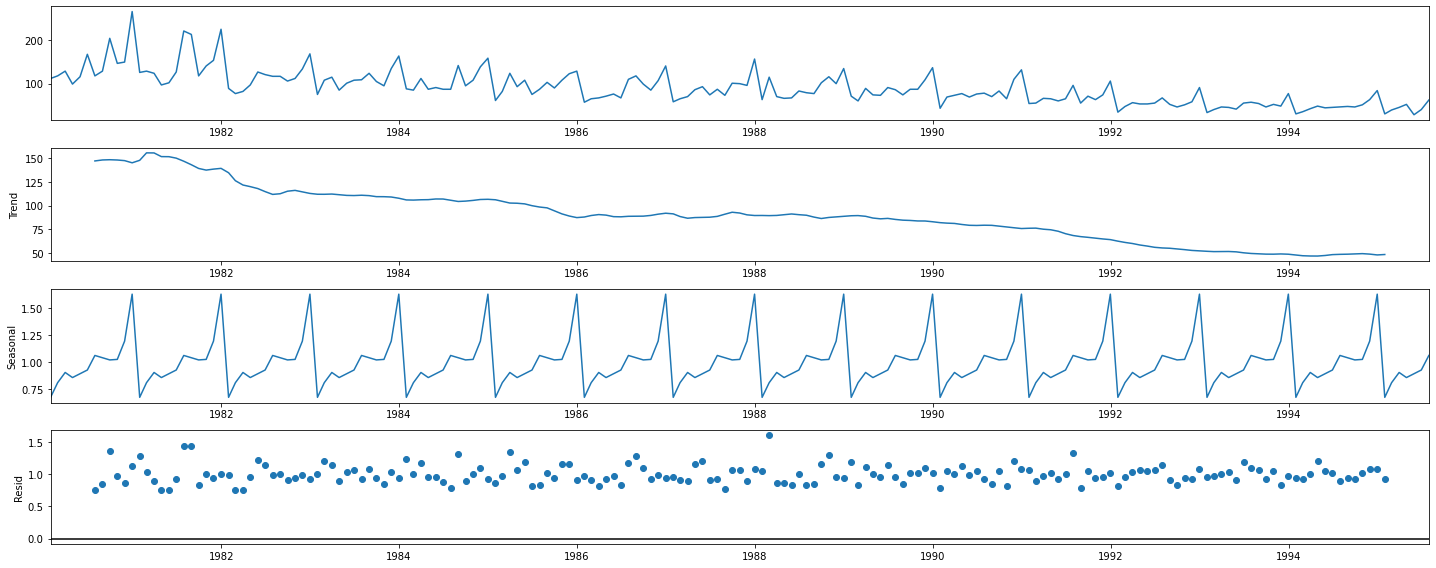

In [24]:
## Multiplicative Decomposition
decomposition_mul = seasonal_decompose(df,model='multiplicative')
decomposition_mul.plot();

## 3. Splitting the Data in Train and Test Data

In [25]:
df_train=df[df.index.year < 1991]
df_test=df[df.index.year >= 1991]

In [26]:
df_train.shape

(132, 1)

In [27]:
df_test.shape

(55, 1)

In [28]:
df_train.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [29]:
df_train.tail()

,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [30]:
df_test.head()

,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


In [31]:
df_test.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


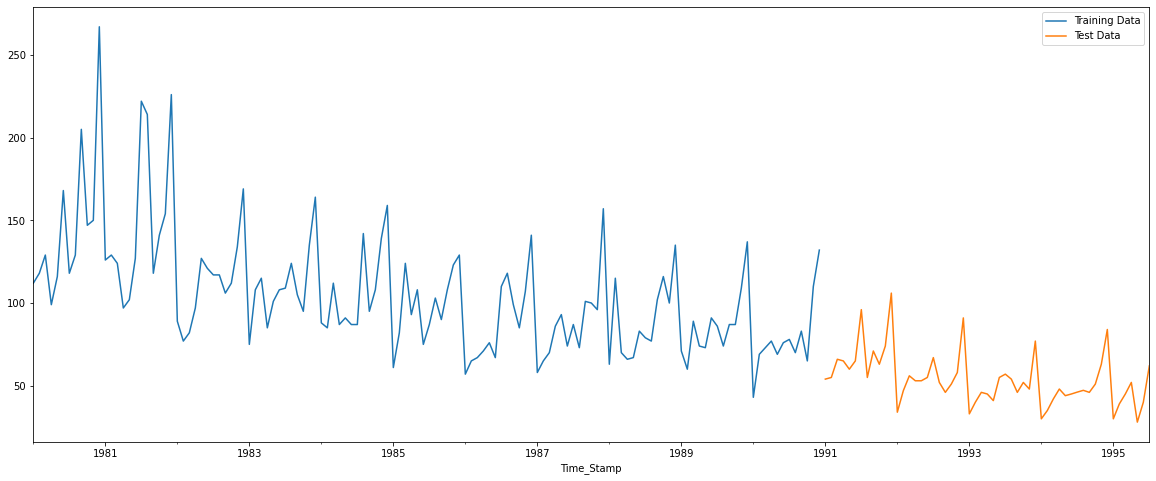

In [32]:
df_train['Rose'].plot()
df_test['Rose'].plot()
plt.legend(['Training Data', 'Test Data'])
plt.show()

## 4. Smoothning Models

### A. Simple Exponential Smoothning

In [33]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt 

In [34]:
SES_train = df_train.copy()
SES_test = df_test.copy()

In [35]:
# Applying Simple Exponential Smoothning algorithm on the Training data
model_ses=SimpleExpSmoothing(SES_train['Rose'])
# Fitting the  model and asking python to choose the optimal parameters
model_ses_fit=model_ses.fit(optimized=True)

C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [36]:
model_ses_fit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [37]:
print('Alpha value is:', model_ses.params['smoothing_level'])

Alpha value is: 0.0987493111726833


In [38]:
# Adding the fitted values (predictions on the training set)
SES_train['predict'] = model_ses_fit.fittedvalues
print(SES_train.head(),'\n')

             Rose     predict
Time_Stamp                   
1980-01-31  112.0  134.387202
1980-02-29  118.0  132.176481
1980-03-31  129.0  130.776564
1980-04-30   99.0  130.601129
1980-05-31  116.0  127.480539 



In [39]:
# Using fitted training model to forecast on the test dataset
SES_test['predict'] = model_ses_fit.forecast(steps=len(SES_test))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104983
1991-02-28,55.0,87.104983
1991-03-31,66.0,87.104983
1991-04-30,65.0,87.104983
1991-05-31,60.0,87.104983


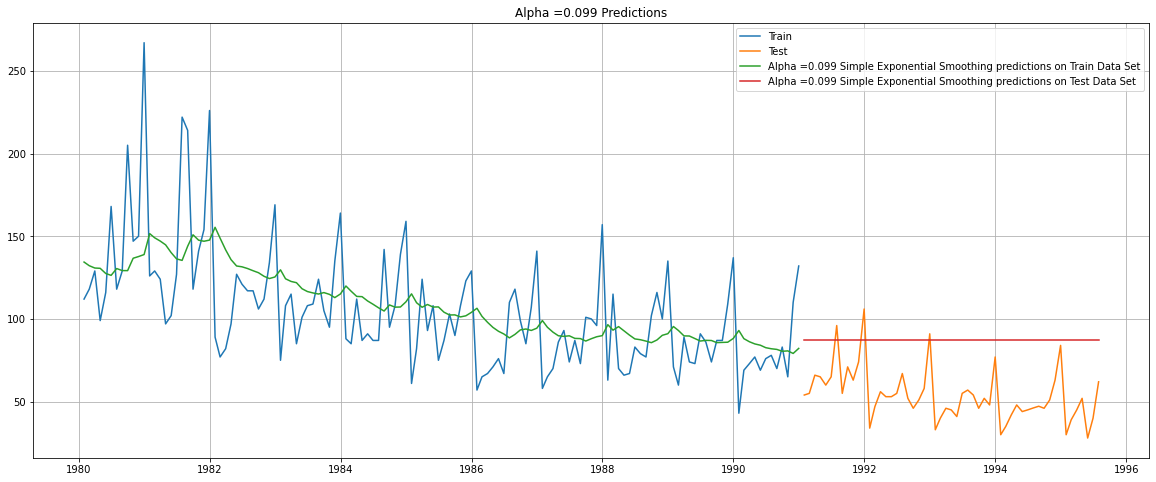

In [40]:
## Plotting on both the Training and Test data

plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.099 Simple Exponential Smoothing predictions on Train Data Set')
plt.plot(SES_test['predict'], label='Alpha =0.099 Simple Exponential Smoothing predictions on Test Data Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.099 Predictions');

Here, we see that this Simple Exponential Smoothing (in which the parameters are automatically estimated by Python) is working like a Simple avg model. This is happening because the value  𝛼  is close to 0.
Lesser the value of  𝛼 , more weight is given to older value.

In [41]:
## Mean Absolute Percentage Error (MAPE) - Function Definition
from   sklearn.metrics                 import  mean_squared_error
import statsmodels.tools.eval_measures as      em

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [42]:
print('TRAIN SES MAPE:',MAPE(SES_train['Rose'],SES_train['predict']))
print('TRAIN SES RMSE:',np.sqrt(mean_squared_error(SES_train['Rose'],SES_train['predict'])))
#different way to calculate RMSE
print('TRAIN SES RMSE (calculated using statsmodels):',em.rmse(SES_train['Rose'],SES_train['predict'].values))

print('\nTEST SES MAPE:',MAPE(SES_test['Rose'],SES_test['predict']))
print('TEST SES RMSE:',np.sqrt(mean_squared_error(SES_test['Rose'],SES_test['predict'])))
#different way to calculate RMSE
print('TEST SES RMSE (calculated using statsmodels):',em.rmse(SES_test['Rose'],SES_test['predict']))

TRAIN SES MAPE: 24.030013352609238
TRAIN SES RMSE: 31.50086855172781
TRAIN SES RMSE (calculated using statsmodels): 31.50086855172781

TEST SES MAPE: 75.73274061137325
TEST SES RMSE: 36.748146510883274
TEST SES RMSE (calculated using statsmodels): 36.748146510883274


In [43]:
result_ses = pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(SES_train['Rose'],SES_train['predict']))],
                          'Train MAPE':[MAPE(SES_train['Rose'],SES_train['predict'])],
                          'Test RMSE': [np.sqrt(mean_squared_error(SES_test['Rose'],SES_test['predict']))],
                          'Test MAPE': [MAPE(SES_test['Rose'],SES_test['predict'])]},index=['Alpha=0.099,SES'])
result_ses

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"Alpha=0.099,SES",31.500869,24.030013,36.748147,75.732741


### B. Double Exponential Smoothing Holt

In [44]:
DES_train = df_train.copy()
DES_test = df_test.copy()

In [45]:
model_DES=Holt(DES_train['Rose'])
model_DES_fit=model_DES.fit(optimized=True)

C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [46]:
model_DES.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [47]:
print('Alpha value is:', model_DES.params['smoothing_level'])
print('Beta value is:', model_DES.params['smoothing_trend'])

Alpha value is: 0.017549790270679714
Beta value is: 3.236153800377395e-05


In [48]:
# Adding the fitted values (predictions on the training set)
DES_train['predict'] = model_DES_fit.fittedvalues
print(DES_train.head(),'\n')

             Rose     predict
Time_Stamp                   
1980-01-31  112.0  138.328235
1980-02-29  118.0  137.373585
1980-03-31  129.0  136.540976
1980-04-30   99.0  135.916023
1980-05-31  116.0  134.775523 



In [49]:
# Using the fitted model on the training set to forecast on the test set
DES_test['predict'] = model_DES_fit.forecast(steps=len(DES_test))
DES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,73.259732
1991-02-28,55.0,72.767150
1991-03-31,66.0,72.274569
1991-04-30,65.0,71.781987
1991-05-31,60.0,71.289405


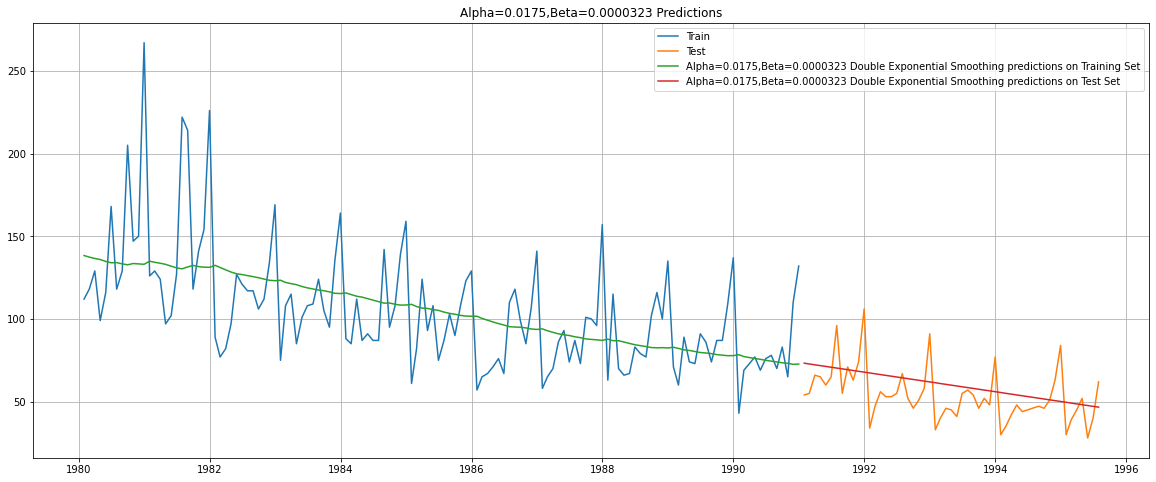

In [50]:
## Plotting on both the Training and Test data

plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict'], label='Alpha=0.0175,Beta=0.0000323 Double Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['predict'], label='Alpha=0.0175,Beta=0.0000323 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.0175,Beta=0.0000323 Predictions');

In [51]:
print('TRAIN DES MAPE:',MAPE(DES_train['Rose'],DES_train['predict']))
print('TRAIN DES RMSE:',np.sqrt(mean_squared_error(DES_train['Rose'],DES_train['predict'])))

print('\nTEST DES MAPE:',MAPE(DES_test['Rose'],DES_test['predict']))
print('TEST DES RMSE:',np.sqrt(mean_squared_error(DES_test['Rose'],DES_test['predict'])))

TRAIN DES MAPE: 21.946659712187014
TRAIN DES RMSE: 30.89079437725461

TEST DES MAPE: 26.58682975984329
TEST DES RMSE: 15.690402133338855


In [52]:
result_des=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(DES_train['Rose'],DES_train['predict']))],
                          'Train MAPE':[MAPE(DES_train['Rose'],DES_train['predict'])],
                          'Test RMSE': [np.sqrt(mean_squared_error(DES_test['Rose'],DES_test['predict']))],
                          'Test MAPE': [MAPE(DES_test['Rose'],DES_test['predict'])]},index=['Alpha=0.0175,B=0.0000323,DES'])
result_des

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"Alpha=0.0175,B=0.0000323,DES",30.890794,21.94666,15.690402,26.58683


### C. Holt Winter Smoothing

In [53]:
TES_train = df_train.copy()
TES_test = df_test.copy()

In [54]:
model_TES=ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_fit=model_TES.fit(optimized=True)

In [55]:
model_TES_fit.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
print('Alpha value is:', model_TES.params['smoothing_level'])
print('Beta value is:', model_TES.params['smoothing_trend'])
print('Gamma value is:',model_TES.params['smoothing_seasonal'])

Alpha value is: 0.06569374607191865
Beta value is: 0.05192938504457338
Gamma value is: 3.879136202038614e-06


In [57]:
# Adding the fitted values (predictions on the training set)
TES_train['predict'] = model_TES_fit.fittedvalues
print(TES_train.head(),'\n')

             Rose     predict
Time_Stamp                   
1980-01-31  112.0  112.004095
1980-02-29  118.0  126.293631
1980-03-31  129.0  136.497755
1980-04-30   99.0  118.077887
1980-05-31  116.0  130.367778 



In [58]:
# Using the fitted model on the training set to forecast on the test set
TES_test['predict'] = model_TES_fit.forecast(steps=len(TES_test))
TES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,56.689174
1991-02-28,55.0,64.129166
1991-03-31,66.0,69.856436
1991-04-30,65.0,60.877474
1991-05-31,60.0,68.237072


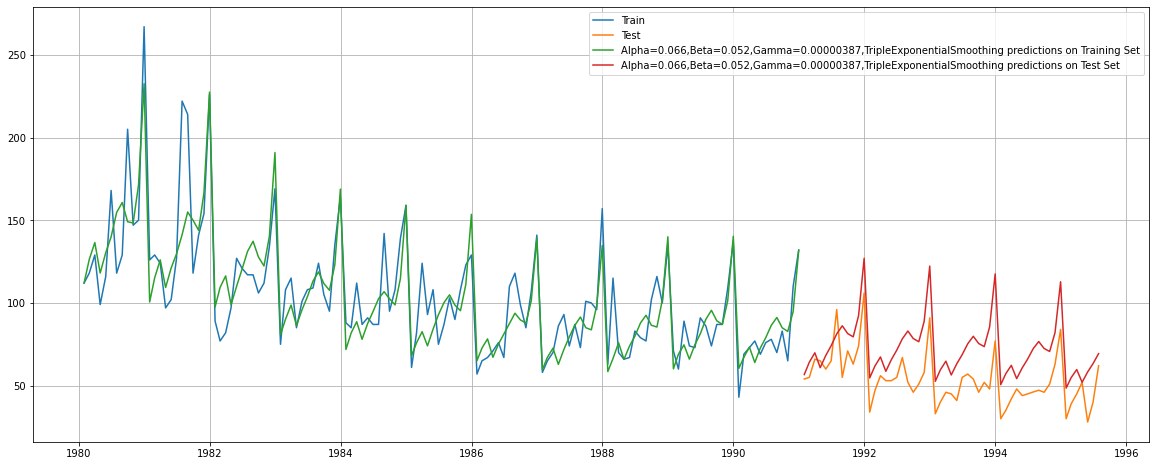

In [59]:
## Plotting on both the Training and Test using autofit

plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['predict'], label='Alpha=0.066,Beta=0.052,Gamma=0.00000387,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict'], label='Alpha=0.066,Beta=0.052,Gamma=0.00000387,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [60]:
print('TRAIN TES MAPE:',MAPE(TES_train['Rose'],TES_train['predict']))
print('TRAIN TES RMSE:',np.sqrt(mean_squared_error(TES_train['Rose'],TES_train['predict'])))

print('\nTEST TES MAPE:',MAPE(TES_test['Rose'],TES_test['predict']))
print('TEST TES RMSE:',np.sqrt(mean_squared_error(TES_test['Rose'],TES_test['predict'])))

TRAIN TES MAPE: 12.404198453058825
TRAIN TES RMSE: 18.405018017651653

TEST TES MAPE: 38.590893771340866
TEST TES RMSE: 20.959969507894122


In [61]:
result_tes=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(TES_train['Rose'],TES_train['predict']))],
                          'Train MAPE':[MAPE(TES_train['Rose'],TES_train['predict'])],
                          'Test RMSE': [np.sqrt(mean_squared_error(TES_test['Rose'],TES_test['predict']))],
                          'Test MAPE': [MAPE(TES_test['Rose'],TES_test['predict'])]},index=['Alpha=0.066,Beta=0.052,Gamma=0.00000387,TES'])
result_tes

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"Alpha=0.066,Beta=0.052,Gamma=0.00000387,TES",18.405018,12.404198,20.95997,38.590894


### D. Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
train_time = [i+1 for i in range(len(df_train))]
test_time = [i+133 for i in range(len(df_test))]
print('Training Time instance','\n',train_time,'\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [64]:
df_train.shape

(132, 1)

In [65]:
df_test.shape

(55, 1)

In [66]:
lr_train=df_train.copy()
lr_test=df_test.copy()

In [67]:
lr_train['time']=train_time
lr_test['time']=test_time

In [68]:
lr_train.head()

,Rose,time
Time_Stamp,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


In [69]:
lr_test.head()

,Rose,time
Time_Stamp,,
1991-01-31,54.0,133
1991-02-28,55.0,134
1991-03-31,66.0,135
1991-04-30,65.0,136
1991-05-31,60.0,137


In [70]:
model_lr=LinearRegression()
model_lr_fit=model_lr.fit(lr_train[['time']].values,lr_train['Rose'].values)

In [71]:
lr_predict_train = model_lr_fit.predict(lr_train[['time']])
lr_predict_test = model_lr_fit.predict(lr_test[['time']])

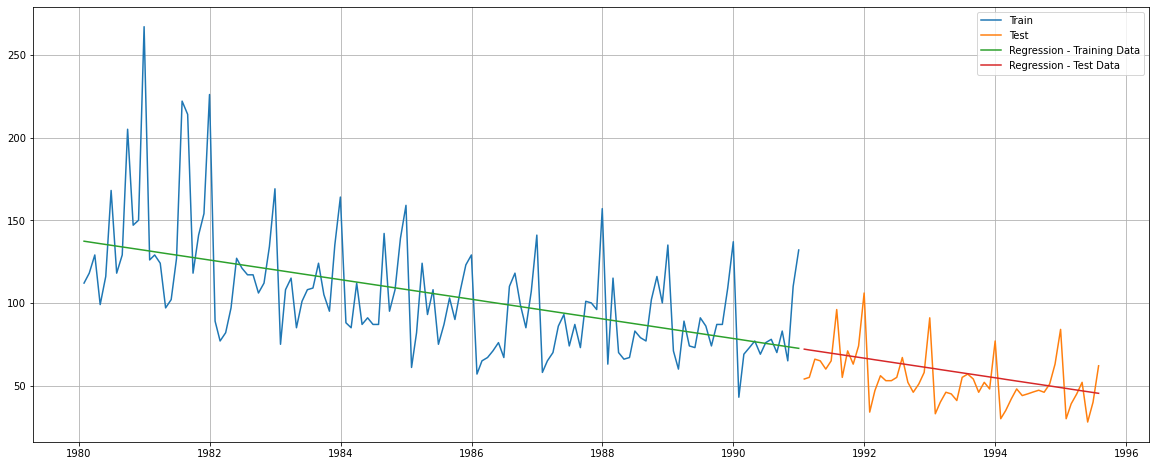

In [72]:
# Adding the training predictions to above Linear Regression Training data
lr_train['predict'] = lr_predict_train
# Adding the predictions on the test set to  above Linear Regression Test data
lr_test['predict'] = lr_predict_test

# Plotting the actual training data
plt.plot(df_train['Rose'], label='Train')
# Plotting the actual test data
plt.plot(df_test['Rose'], label='Test')

# Plotting the predicted training data
plt.plot(lr_train['predict'], label='Regression - Training Data')
# Plotting the predicted test data
plt.plot(lr_test['predict'], label='Regression - Test Data')

# Setting the location of the legend
plt.legend(loc='best')
plt.grid();

In [73]:
print('TRAIN LR MAPE:',MAPE(lr_train['Rose'].values,lr_predict_train))
print('TRAIN LR RMSE:',np.sqrt(mean_squared_error(lr_train['Rose'].values,lr_predict_train)))

print('\nTEST LR MAPE:',MAPE(lr_test['Rose'].values,lr_predict_test))
print('TEST LR RMSE:',np.sqrt(mean_squared_error(lr_test['Rose'].values,lr_predict_test)))

TRAIN LR MAPE: 21.62404168769719
TRAIN LR RMSE: 30.718135411331016

TEST LR MAPE: 24.848940316149378
TEST LR RMSE: 15.255435079735083


In [74]:
result_lr=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(lr_train['Rose'],lr_predict_train))],
                          'Train MAPE':[MAPE(lr_train['Rose'],lr_predict_train)],
                          'Test RMSE': [np.sqrt(mean_squared_error(lr_test['Rose'].values,lr_predict_test))],
                          'Test MAPE': [MAPE(lr_test['Rose'].values,lr_predict_test)]},index=['Linear Regression'])


result_lr

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
Linear Regression,30.718135,21.624042,15.255435,24.84894


### D. Naive Bayes

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [75]:
nb_train=df_train.copy()
nb_test=df_test.copy()

In [76]:
nb_train['Rose'].values[-1]

132.0

In [77]:
nb_test['predict']=nb_train['Rose'].values[-1]
nb_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,132.0
1991-02-28,55.0,132.0
1991-03-31,66.0,132.0
1991-04-30,65.0,132.0
1991-05-31,60.0,132.0


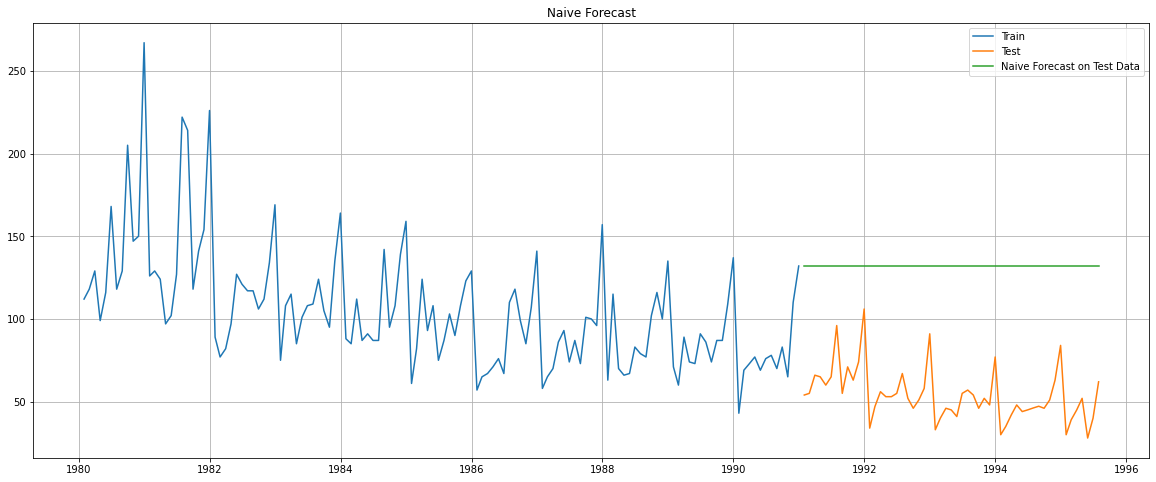

In [78]:
## Plotting the actual training data
plt.plot(nb_train['Rose'], label='Train')
## Plotting the acutal test data
plt.plot(df_test['Rose'], label='Test')

## Plottig the predicted test data
plt.plot(nb_test['predict'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [79]:
print('\nTEST NB MAPE:',MAPE(nb_test['Rose'],nb_test['predict']))
print('TEST NB RMSE:',np.sqrt(mean_squared_error(nb_test['Rose'].values,nb_test['predict'])))


TEST NB MAPE: 164.5788843756878
TEST NB RMSE: 79.6722381766813


In [80]:
result_nb=pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(nb_test['Rose'].values,nb_test['predict']))],
                        'Test MAPE': MAPE(nb_test['Rose'].values,nb_test['predict'])},index=['Naive'])


result_nb

,Test RMSE,Test MAPE
Naive,79.672238,164.578884


### E. Simple Average Method

In [81]:
sa_train=df_train.copy()
sa_test=df_test.copy()

In [82]:
sa_test['mean_forecast'] = sa_train['Rose'].mean()
sa_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


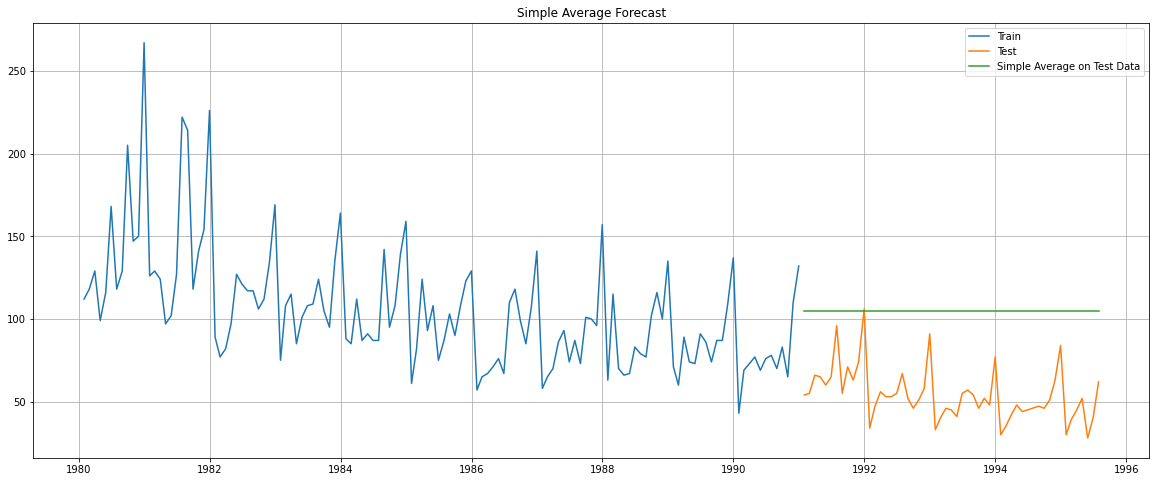

In [83]:
plt.plot(sa_train['Rose'], label='Train')
plt.plot(sa_test['Rose'], label='Test')
plt.plot(sa_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [84]:
print('\nTEST SA MAPE:',MAPE(sa_test['Rose'],sa_test['mean_forecast']))
print('TEST SA RMSE:',np.sqrt(mean_squared_error(sa_test['Rose'],sa_test['mean_forecast'])))


TEST SA MAPE: 110.37538272705338
TEST SA RMSE: 53.41305672207565


In [85]:
result_sa=pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(sa_test['Rose'],sa_test['mean_forecast']))],
                        'Test MAPE': MAPE(sa_test['Rose'],sa_test['mean_forecast'])},index=['Simple Avg'])


result_sa

,Test RMSE,Test MAPE
Simple Avg,53.413057,110.375383


### F. Moving Average Method

In [86]:
MA=df.copy()
MA.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [87]:
# rolling Moving Averages

# 2 period Moving Average Computation
MA['Trailing_2'] = MA['Rose'].rolling(2).mean()

# 4 period Moving Average Computation
MA['Trailing_4'] = MA['Rose'].rolling(4).mean()

# 6 period Moving Average Computation
MA['Trailing_6'] = MA['Rose'].rolling(6).mean()

# 9 period Moving Average Computation
MA['Trailing_9'] = MA['Rose'].rolling(9).mean()

MA.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


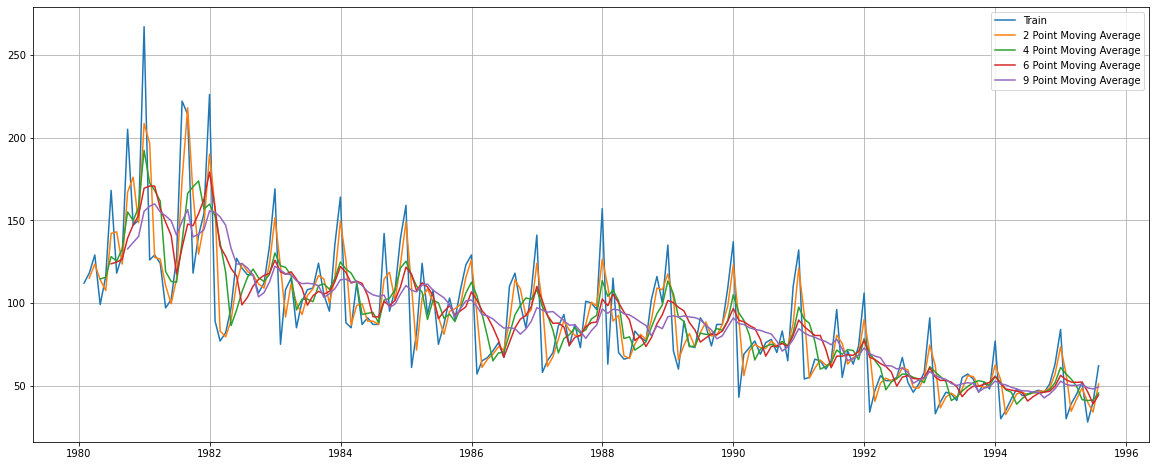

In [88]:
## Plotting on the whole data and comparing moving avg outputs

plt.plot(MA['Rose'],label='Train')
plt.plot(MA['Trailing_2'],label='2 Point Moving Average')
plt.plot(MA['Trailing_4'],label='4 Point Moving Average')
plt.plot(MA['Trailing_6'],label ='6 Point Moving Average')
plt.plot(MA['Trailing_9'],label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [89]:
#Creating train and test set 
trailing_MA_train=MA[MA.index<'1991'] 
trailing_MA_test=MA[MA.index>'1991']

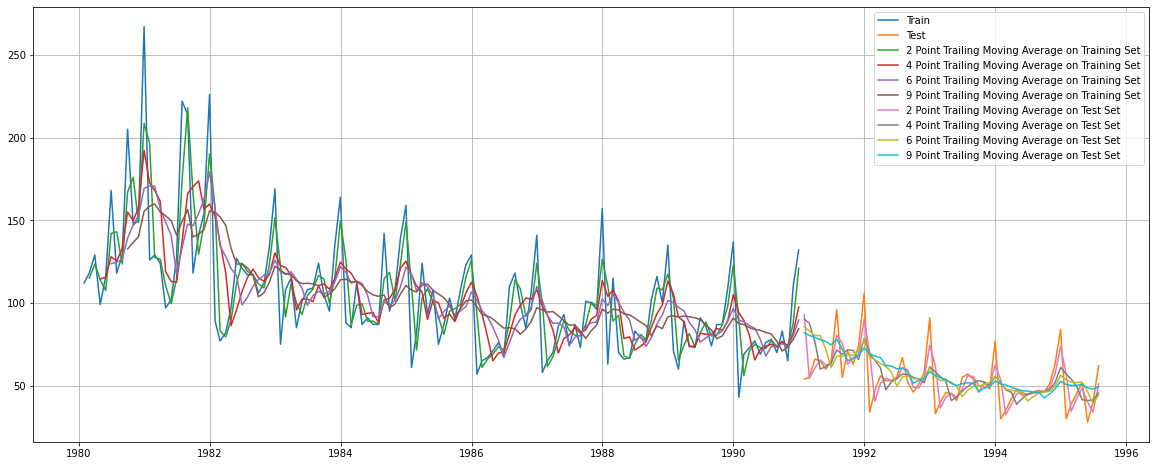

In [90]:
## Plotting on both the Training and Test data


plt.plot(trailing_MA_train['Rose'], label='Train')
plt.plot(trailing_MA_test['Rose'], label='Test')

plt.plot(trailing_MA_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MA_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [91]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA
print('\nTEST MAPE Trailing_2:',MAPE(df_test['Rose'],trailing_MA_test['Trailing_2']))
print('TEST RMSE Trailing_2:',np.sqrt(mean_squared_error(df_test['Rose'],trailing_MA_test['Trailing_2'])))

## Test Data - RMSE and MAPE --> 4 point Trailing MA
print('\nTEST MAPE Trailing_4:',MAPE(df_test['Rose'],trailing_MA_test['Trailing_4']))
print('TEST RMSE Trailing_4:',np.sqrt(mean_squared_error(df_test['Rose'],trailing_MA_test['Trailing_4'])))

## Test Data - RMSE and MAPE --> 6 point Trailing MA
print('\nTEST MAPE Trailing_6:',MAPE(df_test['Rose'],trailing_MA_test['Trailing_6']))
print('TEST RMSE Trailing_6:',np.sqrt(mean_squared_error(df_test['Rose'],trailing_MA_test['Trailing_6'])))

## Test Data - RMSE and MAPE --> 9 point Trailing MA
print('\nTEST MAPE Trailing_9:',MAPE(df_test['Rose'],trailing_MA_test['Trailing_9']))
print('TEST RMSE Trailing_9:',np.sqrt(mean_squared_error(df_test['Rose'],trailing_MA_test['Trailing_9'])))


TEST MAPE Trailing_2: 15.744020860054105
TEST RMSE Trailing_2: 11.529993585816118

TEST MAPE Trailing_4: 21.260789766274122
TEST RMSE Trailing_4: 14.444341803196101

TEST MAPE Trailing_6: 22.38238827550815
TEST RMSE Trailing_6: 14.554943899972065

TEST MAPE Trailing_9: 22.65856039746254
TEST RMSE Trailing_9: 14.721499372244091


In [92]:
result_MA=pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(df_test['Rose'],trailing_MA_test['Trailing_2'])),
                                     np.sqrt(mean_squared_error(df_test['Rose'],trailing_MA_test['Trailing_4'])),
                                     np.sqrt(mean_squared_error(df_test['Rose'],trailing_MA_test['Trailing_6'])),
                                     np.sqrt(mean_squared_error(df_test['Rose'],trailing_MA_test['Trailing_9']))],
                        'Test MAPE': [MAPE(df_test['Rose'],trailing_MA_test['Trailing_2']),
                                     MAPE(df_test['Rose'],trailing_MA_test['Trailing_4']),
                                     MAPE(df_test['Rose'],trailing_MA_test['Trailing_6']),
                                      MAPE(df_test['Rose'],trailing_MA_test['Trailing_9'])]},index=['TrailingMovingAvg_2','TrailingMovingAvg_4','TrailingMovingAvg_6','TrailingMovingAvg_9'])


result_MA

,Test RMSE,Test MAPE
TrailingMovingAvg_2,11.529994,15.744021
TrailingMovingAvg_4,14.444342,21.260790
TrailingMovingAvg_6,14.554944,22.382388
TrailingMovingAvg_9,14.721499,22.658560


Looking at the MAPE and RMSE values - its clear that the 2 point trailing moving averages model gives more accurate forecasts amongst all Trailing moving averages models

## 5.Check for the stationarity of the data

In [93]:
from statsmodels.tsa.stattools import adfuller

- The Augmented Dickey-Fuller test is an unit root test which determines the probability that a unit root is present and subsequently whether the series is non-stationary.

- The hypothesis in a simple form for the ADF test is:

- 𝐻0  : The Time Series has a unit root and is thus non-stationary.
- 𝐻1  : The Time Series does not have a unit root and is thus stationary.
- We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the  𝛼  value.

In [94]:
## Defning a function
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,regression='ct')#running the adf test on the input time series
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    ## creating a series to format the output
    for key,value in dftest[4].items():##running a for loop to format the critical values of the test statistic
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [95]:
adf_test(df_train)

Results of Dickey-Fuller Test:
Test Statistic                  -1.686149
p-value                          0.756909
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -4.037614
Critical Value (5%)             -3.448373
Critical Value (10%)            -3.149257
dtype: float64


- P_value >0.05, so not stationary As p-value is more than 0.05 means the train series is non-stationary therefore we should make it stationary by taking the difference

In [96]:
adf_test(df_train.diff(1).dropna())

Results of Dickey-Fuller Test:
Test Statistic                -6.804433e+00
p-value                        3.894831e-08
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -4.037614e+00
Critical Value (5%)           -3.448373e+00
Critical Value (10%)          -3.149257e+00
dtype: float64


- Series has become Stationary Now

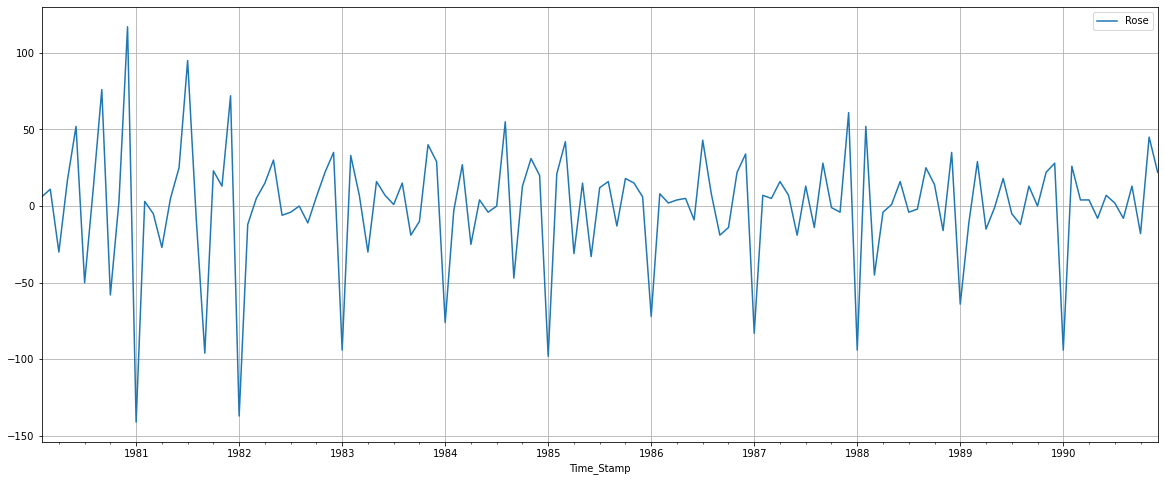

In [97]:
(df_train.diff(1).dropna()).plot(grid=True);

## 6. Build an Automated version of an ARIMA/SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### ARIMA Model

In [98]:
arima_test=df_test.copy()
arima_train=df_train.copy()

In [99]:
dftest = adfuller(arima_train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047063
Number of lags used 13


As p-value is more than 0.05 means the train series is non-stationary therefore we should make it stationary by taking the difference

In [100]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [101]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [102]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(arima_train,order=param, freq='M').fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency i

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380032
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(2, 1, 0) - AIC:1298.6110341605004


C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.8707222264284


C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [103]:
### Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [104]:
model_arima = ARIMA(arima_train['Rose'], order=(0,1,2),freq='M')
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 06 Jun 2021   AIC                           1279.672
Time:                        19:16:46   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


The above model is an AutoRegressive Integrated Moving Average model of order (0,1,2) i.e. the Time Series being regressed upon itself at a lag of 0, the errors from a lag of 2 and a lag and a degree or order differencing of 1 to make it stationary.

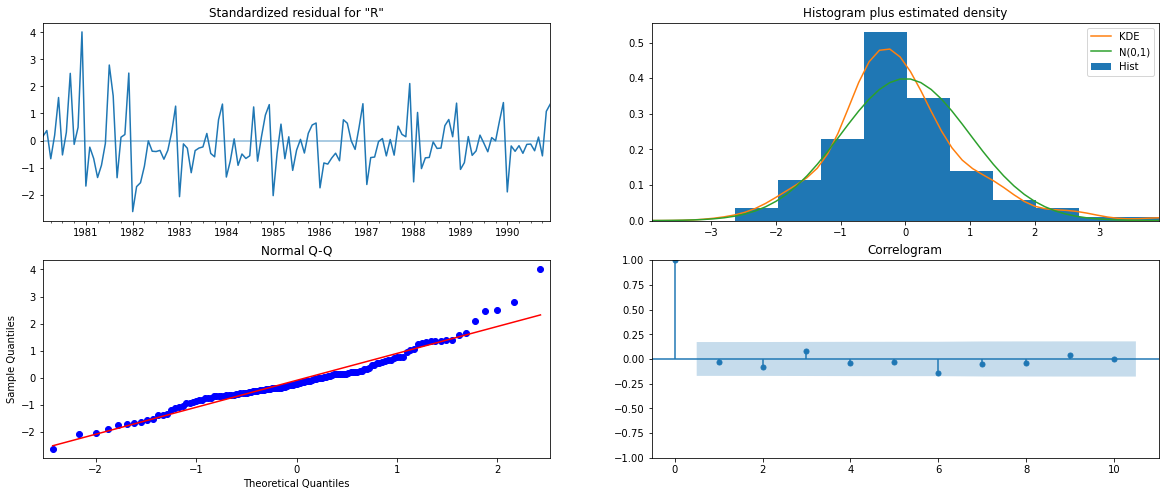

In [105]:
model_arima_fit.plot_diagnostics();

The diagnostics plot looks like that it tallies with the theoretical values. i.e.

histogram is normal
Blue dots are closer to best fit line

#### Predict the Train and Test Data

In [106]:
arima_train_predict = model_arima_fit.forecast(steps=len(arima_train))
arima_test_predict = model_arima_fit.forecast(steps=len(arima_test))

In [107]:
print('TRAIN ARIMA MAPE:',MAPE(arima_train['Rose'],arima_train_predict.values))
print('TRAIN ARIMA RMSE:',np.sqrt(mean_squared_error(arima_train['Rose'],arima_train_predict.values)))

print('\nTEST ARIMA MAPE:',MAPE(arima_test['Rose'],arima_test_predict.values))
print('TEST ARIMA RMSE:',np.sqrt(mean_squared_error(arima_test['Rose'],arima_test_predict.values)))



TRAIN ARIMA MAPE: 23.503069708602244
TRAIN ARIMA RMSE: 40.00190886225956

TEST ARIMA MAPE: 76.75821917912556
TEST ARIMA RMSE: 37.258604698102964


In [108]:
result_arima=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(arima_train['Rose'],arima_train_predict.values))],
                          'Train MAPE':[MAPE(arima_train['Rose'],arima_train_predict.values)],
                          'Test RMSE': [np.sqrt(mean_squared_error(arima_test['Rose'],arima_test_predict.values))],
                          'Test MAPE': [MAPE(arima_test['Rose'],arima_test_predict.values)]},index=['Auto Arima (0,1,2)'])


result_arima

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"Auto Arima (0,1,2)",40.001909,23.50307,37.258605,76.758219


### SARIMA Model

In [109]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

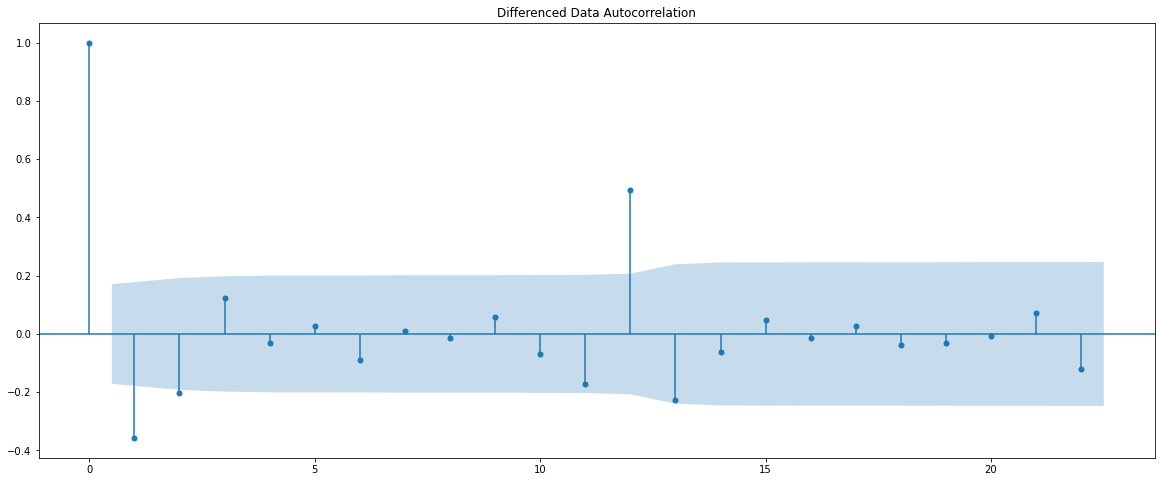

In [110]:
plot_acf(df_train.diff().dropna(),title='Differenced Data Autocorrelation');

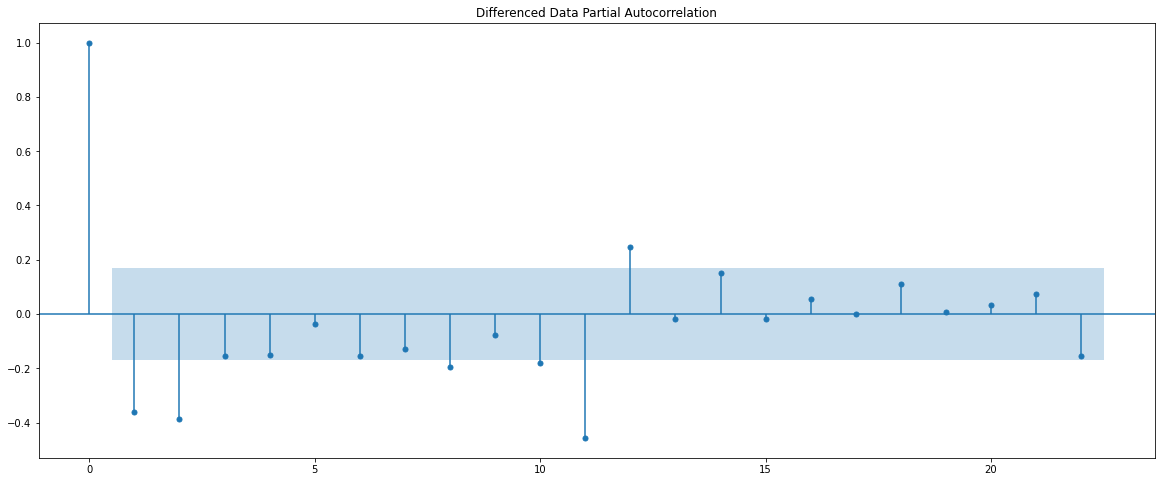

In [111]:
plot_pacf(df_train.diff().dropna(),title='Differenced Data Partial Autocorrelation');

- from ACF Model Seasonality value seems to be 12

In [112]:
sarima_train=df_train.copy()
sarima_test=df_test.copy()

In [113]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [114]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [115]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(sarima_train.values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380911
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301621102
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776037
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753504
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601602
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.733218265448
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894562
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374416
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.339072914358
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244222538
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383859
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.766313356333
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606717374
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809266386
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094527
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302789
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.245665553056
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520069
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670279381
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12)

In [116]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

,param,seasonal,AIC
53,"(0, 1, 2)","(2, 1, 2, 12)",774.969119
107,"(1, 1, 2)","(2, 1, 2, 12)",776.940108
161,"(2, 1, 2)","(2, 1, 2, 12)",776.996101
35,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
160,"(2, 1, 2)","(2, 1, 1, 12)",783.703652
89,"(1, 1, 1)","(2, 1, 2, 12)",783.899095
41,"(0, 1, 2)","(0, 1, 2, 12)",784.014096
149,"(2, 1, 2)","(0, 1, 2, 12)",784.141038
142,"(2, 1, 1)","(2, 1, 1, 12)",784.892805
47,"(0, 1, 2)","(1, 1, 2, 12)",785.823714


In [117]:
model_sarima = sm.tsa.statespace.SARIMAX(sarima_train.values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_sarima_fit = model_sarima.fit(maxiter=1000)
print(model_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 06 Jun 2021   AIC                            774.969
Time:                                    19:19:23   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

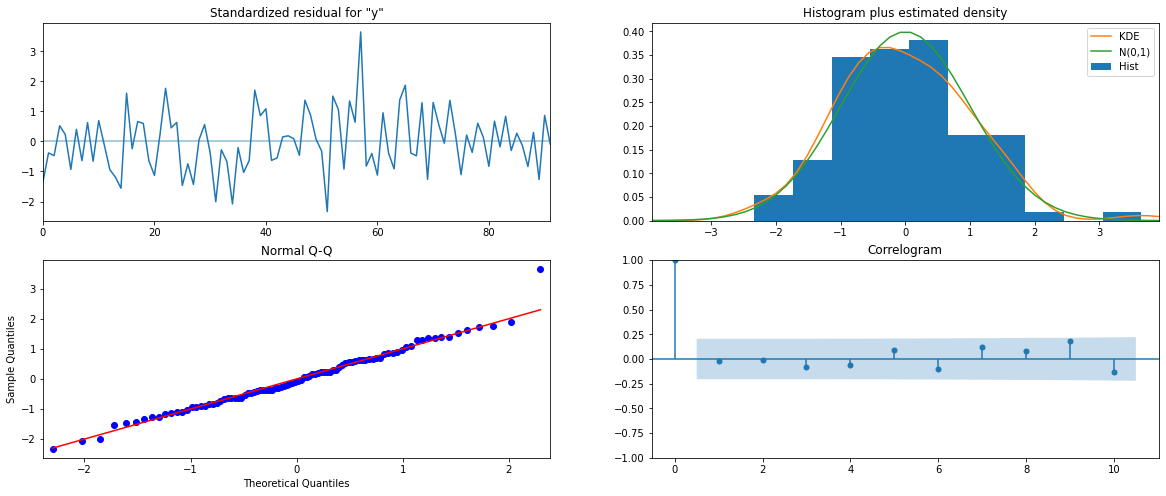

In [118]:
model_sarima_fit.plot_diagnostics();

In [119]:
sarima_train_predict = model_sarima_fit.forecast(steps=len(sarima_train))
sarima_test_predict = model_sarima_fit.forecast(steps=len(sarima_test))

In [120]:
print('TRAIN SARIMA MAPE:',MAPE(sarima_train['Rose'],sarima_train_predict))
print('TRAIN SARIMA RMSE:',np.sqrt(mean_squared_error(sarima_train['Rose'],sarima_train_predict)))

print('\nTEST SARIMA MAPE:',MAPE(sarima_test['Rose'],sarima_test_predict))
print('TEST SARIMA RMSE:',np.sqrt(mean_squared_error(sarima_test['Rose'],sarima_test_predict)))


TRAIN SARIMA MAPE: 50.0279071990022
TRAIN SARIMA RMSE: 55.823649433603144

TEST SARIMA MAPE: 25.224655420052038
TEST SARIMA RMSE: 16.457458985082518


In [121]:
result_sarima=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(sarima_train['Rose'],sarima_train_predict))],
                          'Train MAPE':[MAPE(sarima_train['Rose'],sarima_train_predict)],
                          'Test RMSE': [np.sqrt(mean_squared_error(sarima_test['Rose'],sarima_test_predict))],
                          'Test MAPE': [MAPE(sarima_test['Rose'],sarima_test_predict)]},index=['Auto SARIMA (0, 1, 2)(2, 0, 2, 12)'])


result_sarima

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"Auto SARIMA (0, 1, 2)(2, 0, 2, 12)",55.823649,50.027907,16.457459,25.224655


## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

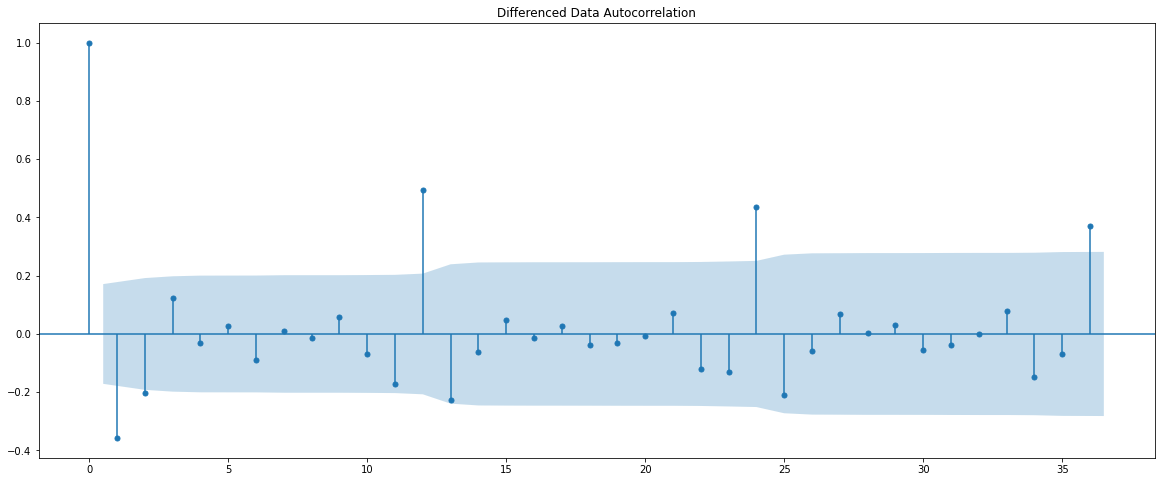

In [122]:
plot_acf(df_train.diff().dropna(),title='Differenced Data Autocorrelation', lags=36);

From the ACF plot it is clear that the lag 1,2 and 12 are significant in a year and lag=12 shows a peak
Lets check if the significance in the lag is because it is carried forward from the previous lags.. lets make a partial auto correlation plot
q=1
Q=0 as 1 is not significant after 12 months period

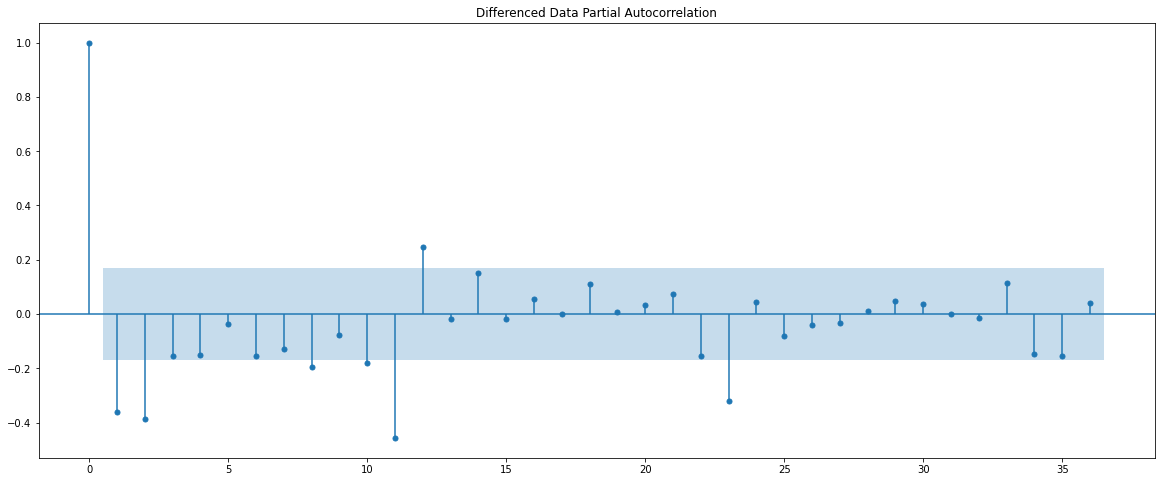

In [123]:
plot_pacf(df_train.diff().dropna(),title='Differenced Data Partial Autocorrelation',lags=36);

Slight change in the signifance level.. however there is no sharp drop is observed

Above taken alpha=0.05.

* The Auto-Regressive (AR) parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average (MA) parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we will take the value of p=1 and q=1 and P=1
D from an ACF plot is taken as 2

### ARIMA Model based on Cutoff ACF/PACF 

In [124]:
model_arima_1 = ARIMA(arima_train['Rose'], order=(1,1,1),freq='M')
model_arima_1_fit = model_arima_1.fit()
print(model_arima_1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -637.287
Date:                Sun, 06 Jun 2021   AIC                           1280.574
Time:                        20:12:29   BIC                           1289.200
Sample:                    01-31-1980   HQIC                          1284.079
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1814      0.076      2.396      0.017       0.033       0.330
ma.L1         -0.9192      0.053    -17.362      0.000      -1.023      -0.815
sigma2       972.5964     88.768     10.957      0.0

C:\Users\tatilak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


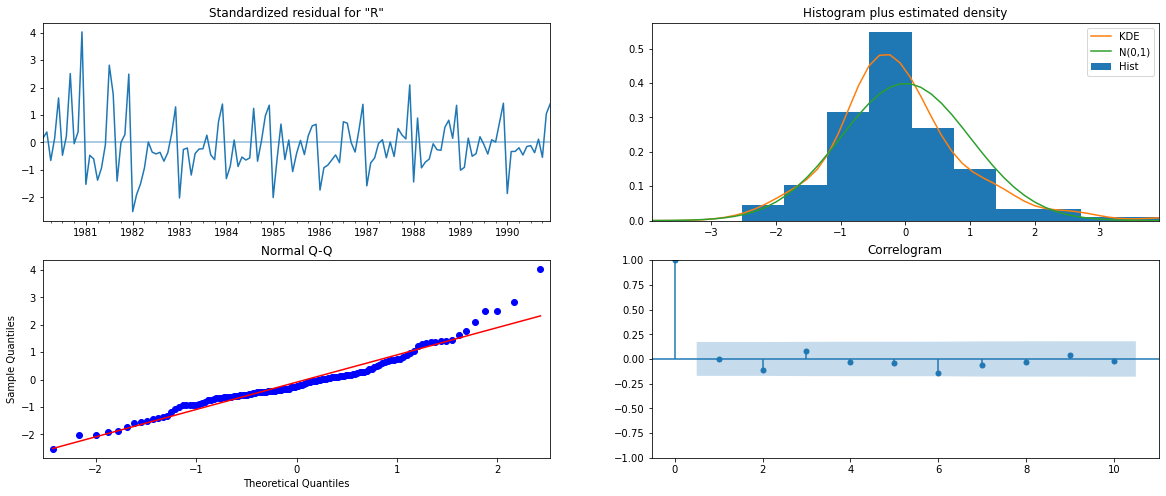

In [125]:
model_arima_1_fit.plot_diagnostics();

#### diagnostic plot Inference
In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

1. The KDE plot of the residuals on the top right is almost similar with the normal distribution.
2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken and is a strong indication that the residuals are normally distributed.
3. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Thus It appears that our ARIMA model is working fine.

In [126]:
arima_train_predict1 = model_arima_1_fit.forecast(steps=len(arima_train))
arima_test_predict1 = model_arima_1_fit.forecast(steps=len(arima_test))

In [127]:
print('TRAIN ARIMA MAPE:',MAPE(arima_train['Rose'],arima_train_predict1.values))
print('TRAIN ARIMA RMSE:',np.sqrt(mean_squared_error(arima_train['Rose'],arima_train_predict1.values)))

print('\nTEST ARIMA MAPE:',MAPE(arima_test['Rose'],arima_test_predict1.values))
print('TEST ARIMA RMSE:',np.sqrt(mean_squared_error(arima_test['Rose'],arima_test_predict1.values)))


TRAIN ARIMA MAPE: 23.49621155832552
TRAIN ARIMA RMSE: 39.93585333877924

TEST ARIMA MAPE: 77.04853914592887
TEST ARIMA RMSE: 37.39534427911093


In [129]:
result_arima_1=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(arima_train['Rose'],arima_train_predict1.values))],
                          'Train MAPE':[MAPE(arima_train['Rose'],arima_train_predict1.values)],
                          'Test RMSE': [np.sqrt(mean_squared_error(arima_test['Rose'],arima_test_predict1.values))],
                          'Test MAPE': [MAPE(arima_test['Rose'],arima_test_predict1.values)]},
                            index=['ARIMA on ACF/PACF Cutoff(1,1,1)'])


result_arima_1

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"ARIMA on ACF/PACF Cutoff(1,1,1)",39.935853,23.496212,37.395344,77.048539


### SARIMA Model based on Cutoff ACF/PACF

In [160]:
model_sarima_1 = sm.tsa.statespace.SARIMAX(sarima_train.values,
                                order=(1,1,1),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_sarima_fit_1 = model_sarima_1.fit(maxiter=1000)

print(model_sarima_fit_1.summary())


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -391.096
Date:                                 Sun, 06 Jun 2021   AIC                            794.193
Time:                                         20:42:13   BIC                            809.389
Sample:                                              0   HQIC                           800.329
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0821      0.127      0.647      0.517      -0.166       0

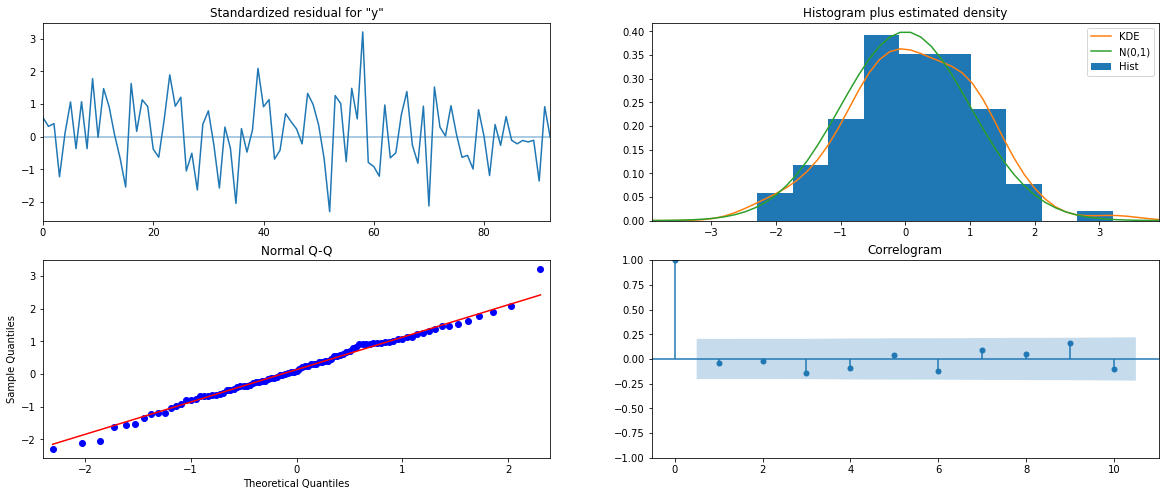

In [161]:
model_sarima_fit_1.plot_diagnostics();

In [162]:
sarima_train_predict1 = model_sarima_fit_1.forecast(steps=len(sarima_train))
sarima_test_predict1 = model_sarima_fit_1.forecast(steps=len(sarima_test))

In [163]:
print('TRAIN SARIMA MAPE:',MAPE(sarima_train['Rose'],sarima_train_predict1))
print('TRAIN SARIMA RMSE:',np.sqrt(mean_squared_error(sarima_train['Rose'],sarima_train_predict1)))

print('\nTEST SARIMA MAPE:',MAPE(sarima_test['Rose'],sarima_test_predict1))
print('TEST SARIMA RMSE:',np.sqrt(mean_squared_error(sarima_test['Rose'],sarima_test_predict1)))


TRAIN SARIMA MAPE: 52.44903749380947
TRAIN SARIMA RMSE: 57.97641410036918

TEST SARIMA MAPE: 23.656259108132748
TEST SARIMA RMSE: 15.938881228888032


In [164]:
result_sarima_1=pd.DataFrame({'Train RMSE':[np.sqrt(mean_squared_error(sarima_train['Rose'].values,sarima_train_predict1))],
                          'Train MAPE':[MAPE(sarima_train['Rose'].values,sarima_train_predict1)],
                          'Test RMSE': [np.sqrt(mean_squared_error(sarima_test['Rose'].values,sarima_test_predict1))],
                          'Test MAPE': [MAPE(sarima_test['Rose'].values,sarima_test_predict1)]},
                             index=['SARIMA on ACF/PACF Cutoff (1, 1, 1)(1, 1, 2, 12)'])


result_sarima_1

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"SARIMA on ACF/PACF Cutoff (1, 1, 1)(1, 1, 2, 12)",57.976414,52.449037,15.938881,23.656259


## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [165]:
results_Df = pd.DataFrame(columns=['Train RMSE','Train MAPE','Test RMSE','Test MAPE'])

In [166]:
results_Df

,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [167]:
results_Df=pd.concat([results_Df,result_MA,result_ses,result_des,result_tes,
                     result_lr,result_nb,result_sa,result_arima,
                      result_sarima,result_arima_1,result_sarima_1])
results_Df

,Train RMSE,Train MAPE,Test RMSE,Test MAPE
TrailingMovingAvg_2,NaN,NaN,11.529994,15.744021
TrailingMovingAvg_4,NaN,NaN,14.444342,21.260790
TrailingMovingAvg_6,NaN,NaN,14.554944,22.382388
TrailingMovingAvg_9,NaN,NaN,14.721499,22.658560
"Alpha=0.099,SES",31.500869,24.030013,36.748147,75.732741
"Alpha=0.0175,B=0.0000323,DES",30.890794,21.946660,15.690402,26.586830
"Alpha=0.066,Beta=0.052,Gamma=0.00000387,TES",18.405018,12.404198,20.959970,38.590894
Linear Regression,30.718135,21.624042,15.255435,24.848940
Naive,NaN,NaN,79.672238,164.578884
Simple Avg,NaN,NaN,53.413057,110.375383


In [168]:
# sorting the results based on lowest RMSE

print('Sorted by RMSE values on the Test Data:')
display(results_Df.sort_values(by=['Test RMSE']))


Sorted by RMSE values on the Test Data:


,Train RMSE,Train MAPE,Test RMSE,Test MAPE
TrailingMovingAvg_2,NaN,NaN,11.529994,15.744021
TrailingMovingAvg_4,NaN,NaN,14.444342,21.260790
TrailingMovingAvg_6,NaN,NaN,14.554944,22.382388
TrailingMovingAvg_9,NaN,NaN,14.721499,22.658560
Linear Regression,30.718135,21.624042,15.255435,24.848940
"Alpha=0.0175,B=0.0000323,DES",30.890794,21.946660,15.690402,26.586830
"SARIMA on ACF/PACF Cutoff (1, 1, 1)(1, 1, 2, 12)",57.976414,52.449037,15.938881,23.656259
"Auto SARIMA (0, 1, 2)(2, 0, 2, 12)",55.823649,50.027907,16.457459,25.224655
"Alpha=0.066,Beta=0.052,Gamma=0.00000387,TES",18.405018,12.404198,20.959970,38.590894
"Alpha=0.099,SES",31.500869,24.030013,36.748147,75.732741


2 point Trailing moving average is the best model follwed by Linear Regression

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [169]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'].values,
                                order=(1,1,1),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -600.264
Date:                                 Sun, 06 Jun 2021   AIC                           1212.529
Time:                                         21:00:41   BIC                           1230.512
Sample:                                              0   HQIC                          1219.835
                                                 - 187                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0841      0.090      0.935      0.350      -0.092       0

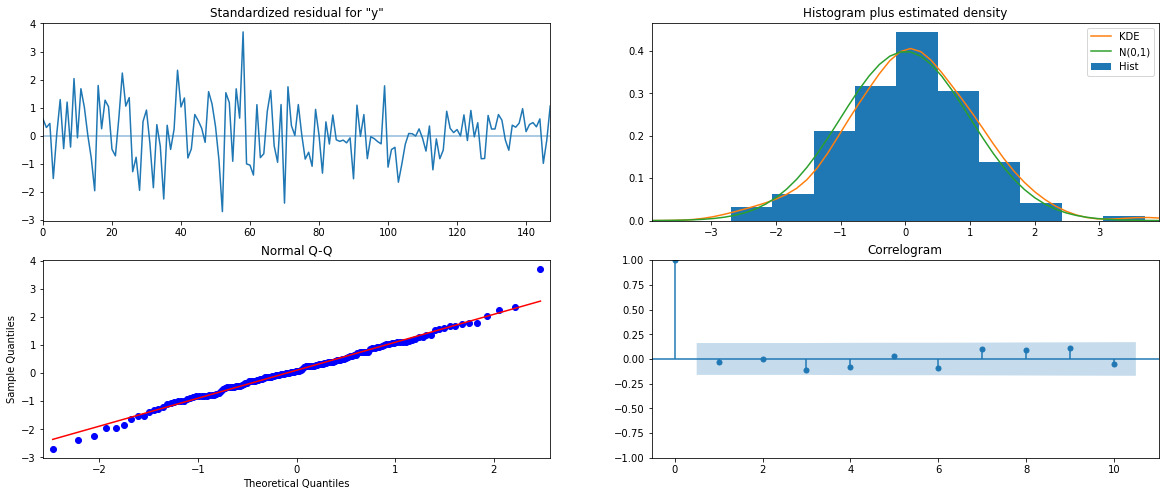

In [170]:
results_full_data_model.plot_diagnostics();

In [171]:
SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [172]:
SARIMA_full_data_forecast = results_full_data_model.forecast(steps=12)

In [173]:
SARIMA_full_data_forecast

array([45.70378807, 44.09763135, 47.40960304, 57.27249556, 82.37920192,
       25.43622752, 33.93290435, 40.40113152, 44.86862857, 29.80281775,
       39.13272049, 54.14673366])

In [174]:
SARIMA_full_data.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,45.703788,13.916713,18.427532,72.980044
1,44.097631,14.217320,16.232195,71.963067
2,47.409603,14.354818,19.274676,75.544530
3,57.272496,14.480562,28.891116,85.653875
4,82.379202,14.604369,53.755164,111.003240


In [175]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 33.28436417770316


In [176]:
pred_full_SARIMA_date = SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

In [163]:
pred_full_SARIMA_date

y,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,48.050869,14.109258,20.397231,75.704507
1995-09-30,44.148276,14.488492,15.751354,72.545198
1995-10-31,47.266890,14.550816,18.747814,75.785966
1995-11-30,52.579366,14.612875,23.938657,81.220075
1995-12-31,69.663916,14.674671,40.902089,98.425743
1996-01-31,32.438970,14.736208,3.556532,61.321407
1996-02-29,37.929349,14.797490,8.926803,66.931896
1996-03-31,42.384844,14.858518,13.262684,71.507004
1996-04-30,46.232912,14.919297,16.991628,75.474197
1996-05-31,35.310188,14.979829,5.950263,64.670114


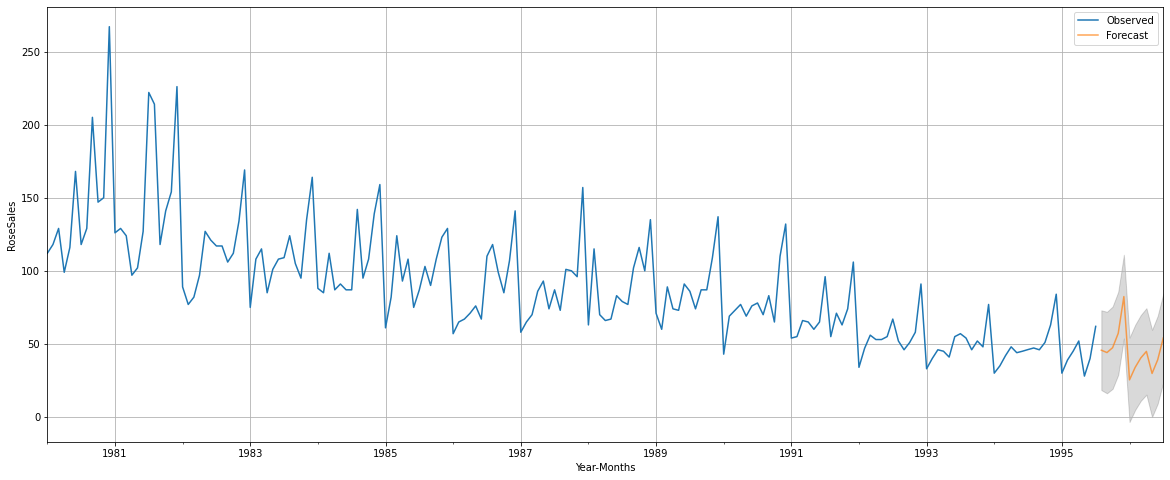

In [177]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'], 
                  pred_full_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RoseSales')
plt.legend(loc='best')
plt.grid();